Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
apartments = df
apartments.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
apartments.shape

(48817, 34)

In [7]:
apartments.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [8]:
apartments.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [9]:
# Which variables are correlated with each other?
correlated = apartments.corr()

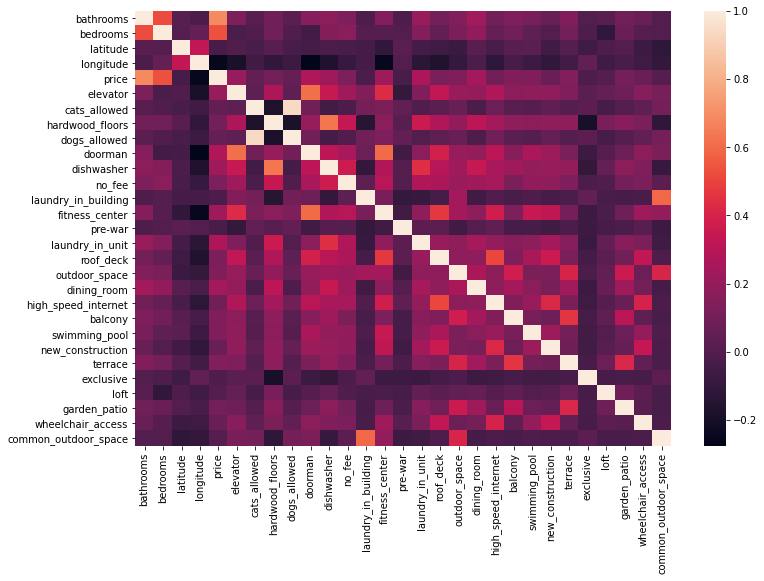

In [10]:
# Display correlation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlated);

In [11]:
# which variables are most correlated with price?
correlated['price'].sort_values(ascending=False)

price                   1.000000
bathrooms               0.687296
bedrooms                0.535503
doorman                 0.276215
laundry_in_unit         0.271195
dining_room             0.242911
fitness_center          0.228775
dishwasher              0.223899
elevator                0.207169
terrace                 0.145973
outdoor_space           0.142146
balcony                 0.139140
swimming_pool           0.134513
no_fee                  0.132240
roof_deck               0.122929
garden_patio            0.103672
hardwood_floors         0.101503
high_speed_internet     0.090269
wheelchair_access       0.072517
new_construction        0.071431
dogs_allowed            0.060401
cats_allowed            0.051453
common_outdoor_space    0.011517
loft                    0.007100
exclusive              -0.013251
laundry_in_building    -0.019417
pre-war                -0.029122
latitude               -0.036286
longitude              -0.251004
Name: price, dtype: float64

In [21]:
# Create feature: number of bedrooms + number of bathrooms
# Add column to apartments dataset
apartments['bed_bath'] = apartments['bathrooms'] + apartments['bedrooms']
apartments.sample(3)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath
42461,1.0,1,2016-04-19 06:15:52,"NO FEE!!!, Amazing deal on 1 Convertible to 2 ...",West 30th Street,40.7498,-73.9961,3650,308 West 30th Street,low,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0
6853,1.0,1,2016-06-23 01:27:21,69th and SECOND AVE.GUT RENOVATED.ONE BEDROOM ...,East 69th Street,40.7667,-73.9590,2050,309 East 69th Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
16558,1.0,0,2016-06-20 19:11:32,LARGE ALCOVE STUDIO IN WHITE GLOVE DOORMAN BUI...,Third Avenue,40.7823,-73.9509,2250,1623 Third Avenue,low,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.0


In [39]:
# Create feature: bedroom to bathroom ratio
# Add column to apartments dataset
apartments['bath_to_bed'] = apartments['bedrooms'] / apartments['bathrooms']
apartments.sample(3)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath,bath_to_bed
5076,1.0,1,2016-04-21 01:35:01,This Clinton one bed room apartment in a total...,West 45th Street,40.7596,-73.9891,2725,305 West 45th Street,low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0
11366,1.0,1,2016-06-12 06:43:55,***Modern lifestyles in the City***<br /> <br/...,Park Pl,40.7138,-74.0103,5495,53 Park Pl,low,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0
21535,1.0,0,2016-06-20 13:10:27,Apartment boost Great Large Sun-kissed Studio ...,355 east 6 Ave,40.7322,-74.0009,2550,355 east 6 Ave,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0


In [41]:
# Declare the target variable
y = apartments['price']

In [42]:
# Declare feature variables
X = apartments[['bed_bath', 'bath_to_bed']]

In [43]:
# Split the data into two sets
# Train on data from April & May 2016
# Test on data from June 2016

train = apartments[(apartments['created'] > '2016-04-01') & (apartments['created'] <'2016-05-31')]
test = apartments[(apartments['created'] > '2016-06-01') & (apartments['created'] <'2016-06-30')]

In [72]:
train.isnull().sum()

bathrooms                 0
bedrooms                  0
created                   0
description             969
display_address          69
latitude                  0
longitude                 0
price                     0
street_address            6
interest_level            0
elevator                  0
cats_allowed              0
hardwood_floors           0
dogs_allowed              0
doorman                   0
dishwasher                0
no_fee                    0
laundry_in_building       0
fitness_center            0
pre-war                   0
laundry_in_unit           0
roof_deck                 0
outdoor_space             0
dining_room               0
high_speed_internet       0
balcony                   0
swimming_pool             0
new_construction          0
terrace                   0
exclusive                 0
loft                      0
garden_patio              0
wheelchair_access         0
common_outdoor_space      0
bed_bath                  0
bath_to_bed         

In [45]:
test.sample(3)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath,bath_to_bed
11693,1.0,1,2016-06-24 06:27:45,<p><a website_redacted,East 34th Street,40.7444,-73.9754,3600,300 East 34th Street,low,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,2.0,1.0
15637,1.0,3,2016-06-08 02:48:23,Actual photos!!!!!!!!!!!! This will end your s...,Bank Street,40.7365,-74.0049,5400,78 Bank Street,low,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,3.0
10705,1.0,2,2016-06-22 06:19:15,Luxury living in the east village! This huge f...,East 2nd Street,40.7223,-73.9839,3300,194 East 2nd Street,low,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,2.0


In [46]:
train.shape, test.shape

((31839, 36), (16973, 36))

In [47]:
# Instantiate the sklearn regeression class
my_model = LinearRegression()

In [48]:
# Fit model to training dataset

X_train = train[['bed_bath', 'bath_to_bed']]
X_test = test[['bed_bath', 'bath_to_bed']]
y_train = train['price']
y_test = train['price']

my_model.fit(X_train, y_train)

ValueError: ignored